# Iris Sample

In [1]:
import os
import urllib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define some locations
IRIS_TRAINING = "iris_training.csv"
IRIS_TRAINING_URL = "http://download.tensorflow.org/data/iris_training.csv"

IRIS_TEST = "iris_test.csv"
IRIS_TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

In [3]:
# load data from internet

if not os.path.exists(IRIS_TRAINING):
    raw = urllib.urlopen(IRIS_TRAINING_URL).read()
    with open(IRIS_TRAINING,'w') as f:
        f.write(raw)

if not os.path.exists(IRIS_TEST):
    raw = urllib.urlopen(IRIS_TEST_URL).read()
    with open(IRIS_TEST,'w') as f:
        f.write(raw)

In [4]:
# Define the training inputs
def get_train_inputs():
    x = tf.constant(training_set.data)
    y = tf.constant(training_set.target)
    #  y = tf.summary.scalar(, training_set.target)
    return x, y

In [5]:
# Define the test inputs
def get_test_inputs():
    x = tf.constant(test_set.data)
    y = tf.constant(test_set.target)
    return x, y

In [6]:
# Load datasets.
training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename=IRIS_TRAINING,
    target_dtype=np.int,
    features_dtype=np.float32)

test_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename=IRIS_TEST,
    target_dtype=np.int,
    features_dtype=np.float32)

In [7]:
training_set.data

array([[ 6.4000001 ,  2.79999995,  5.5999999 ,  2.20000005],
       [ 5.        ,  2.29999995,  3.29999995,  1.        ],
       [ 4.9000001 ,  2.5       ,  4.5       ,  1.70000005],
       [ 4.9000001 ,  3.0999999 ,  1.5       ,  0.1       ],
       [ 5.69999981,  3.79999995,  1.70000005,  0.30000001],
       [ 4.4000001 ,  3.20000005,  1.29999995,  0.2       ],
       [ 5.4000001 ,  3.4000001 ,  1.5       ,  0.40000001],
       [ 6.9000001 ,  3.0999999 ,  5.0999999 ,  2.29999995],
       [ 6.69999981,  3.0999999 ,  4.4000001 ,  1.39999998],
       [ 5.0999999 ,  3.70000005,  1.5       ,  0.40000001],
       [ 5.19999981,  2.70000005,  3.9000001 ,  1.39999998],
       [ 6.9000001 ,  3.0999999 ,  4.9000001 ,  1.5       ],
       [ 5.80000019,  4.        ,  1.20000005,  0.2       ],
       [ 5.4000001 ,  3.9000001 ,  1.70000005,  0.40000001],
       [ 7.69999981,  3.79999995,  6.69999981,  2.20000005],
       [ 6.30000019,  3.29999995,  4.69999981,  1.60000002],
       [ 6.80000019,  3.

In [8]:
training_set.target

array([2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2,
       0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0,
       1, 1, 0, 0, 1])

In [9]:
colorDict = ["green", "red", "blue"]
colorDict

['green', 'red', 'blue']

In [10]:
colors = []
for target in training_set.target:
    colors.append(colorDict[target])

In [11]:
dataX = training_set.data[:,0]

In [12]:
dataY = training_set.data[:,1]

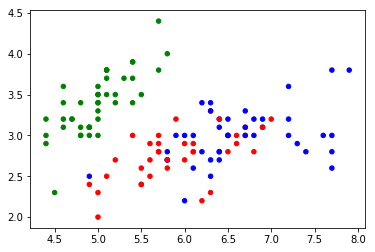

In [13]:
plt.scatter(dataX, dataY, c=colors, s=20) # , cmap=plt.cm.cool)
plt.show()

In [14]:
# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

In [15]:
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=3,
                                            model_dir="/tmp/iris_model9")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 0, '_num_ps_replicas': 0, '_session_config': None, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_tf_random_seed': None, '_model_dir': '/tmp/iris_model9', '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000013C70EB04A8>, '_task_type': None, '_save_checkpoints_secs': 600, '_task_id': 0, '_master': '', '_is_chief': True, '_environment': 'local'}


In [16]:
classifier.fit(input_fn=get_train_inputs, steps=3000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/iris_model9\model.ckpt-12000
INFO:tensorflow:Saving checkpoints for 12001 into /tmp/iris_model9\model.ckpt.
INFO:tensorflow:loss = 0.0220505, step = 12001
INFO:tensorflow:global_step/sec: 1272.98
INFO:tensorflow:loss = 0.022013, step = 12101 (0.080 sec)
INFO:tensorflow:global_step/sec: 1407.42
INFO:tensorflow:loss = 0.0219777, step = 12201 (0.075 sec)
INFO:tensorflow:global_step/sec: 1323.55
INFO:tensorflow:loss = 0.0220106, step = 12301 (0.072 sec)
INFO:tensorflow:global_step/sec: 1256.94
INFO:tensorflow:loss = 0.0218882, step = 12401 (0.080 sec)
INFO:tensorflow:global_ste

DNNClassifier(params={'gradient_clip_norm': None, 'dropout': None, 'optimizer': None, 'hidden_units': [10, 20, 10], 'activation_fn': <function relu at 0x0000013C6C5C59D8>, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x0000013C70F04978>, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),)})

In [17]:
accuracy_score = classifier.evaluate(input_fn=get_test_inputs, steps=1)["accuracy"]
print("\nTest Accuracy: {0:.1f}%\n".format(100*accuracy_score))

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-07-25-22:42:35
INFO:tensorflow:Restoring parameters from /tmp/iris_model9\model.ckpt-15000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-07-25-22:42:35
INFO:tensorflow:Saving dict for global step 15000: accuracy = 0.966667, global_step = 15000, loss = 0.231925

Test Accuracy: 96.7%



In [19]:
# Classify two new flower samples.
def new_samples():
  return np.array(
    [[6.4, 3.2, 4.5, 1.5],
     [5.8, 3.1, 5.0, 1.7]], dtype=np.float32)

In [20]:
predictions = list(classifier.predict_classes(input_fn=new_samples))
predictions

INFO:tensorflow:Restoring parameters from /tmp/iris_model9\model.ckpt-15000


[1, 1]

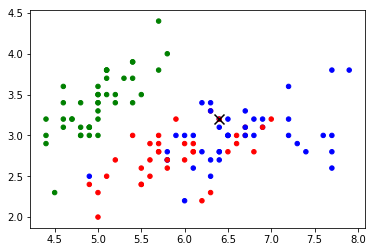

In [38]:
plt.scatter(dataX, dataY, c=colors, s=20)
plt.scatter(new_samples()[0,0], new_samples()[0,1], c=["black"], marker="x", s=100)
plt.show()